## Import all necessary modules

In [2]:
import pandas as pd
import time
from numpy.lib.function_base import vectorize
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV, train_test_split, KFold, cross_validate
from  sklearn.ensemble import RandomForestClassifier

# imort train and test split
from sklearn.model_selection import train_test_split

# accuracy and f1 score
from sklearn.metrics import accuracy_score, f1_score


import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Read the data

In [3]:
df = pd.read_csv("cleaned_data.csv")

## Tokenize the data

In [5]:
df['tokens'] = df['text'].apply(lambda x: nltk.word_tokenize(x))
df.head()

,ID,text,label,tokens
0,7.680980e+17,josh jenkins loking forward tab breders crown ...,1,"[josh, jenkins, loking, forward, tab, breders,..."
1,7.680980e+17,mianusmanjaved congratulations pakistan becomi...,1,"[mianusmanjaved, congratulations, pakistan, be..."
2,7.680980e+17,pepalerts september yesmag taking maine mendoz...,1,"[pepalerts, september, yesmag, taking, maine, ..."
3,7.680980e+17,davidgaibis newly painted wals thanks milion c...,1,"[davidgaibis, newly, painted, wals, thanks, mi..."
4,7.680980e+17,cedricfeschote excited anounce july feschote l...,1,"[cedricfeschote, excited, anounce, july, fesch..."


## Lemmatization of tokens

In [6]:
## Lemmatization of tokens
lemmatizer = nltk.stem.WordNetLemmatizer()
df['lem'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df['tokens'].head()

0    [josh, jenkins, loking, forward, tab, breders,...
1    [mianusmanjaved, congratulations, pakistan, be...
2    [pepalerts, september, yesmag, taking, maine, ...
3    [davidgaibis, newly, painted, wals, thanks, mi...
4    [cedricfeschote, excited, anounce, july, fesch...
Name: tokens, dtype: object

## Stemming of tokens

In [7]:
## Stemming of tokens
stemmer = nltk.stem.SnowballStemmer('english')
df['stem'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])
df['stem'].head()

0    [josh, jenkin, loke, forward, tab, breder, cro...
1    [mianusmanjav, congratul, pakistan, becom, not...
2    [pepalert, septemb, yesmag, take, main, mendoz...
3    [davidgaibi, newli, paint, wal, thank, milion,...
4    [cedricfeschot, excit, anounc, juli, feschot, ...
Name: stem, dtype: object

## Update the text column

In [8]:
## Update the text column
df['text'] = df['tokens'].apply(lambda x: " ".join(x))
df['text'].head()

0    josh jenkins loking forward tab breders crown ...
1    mianusmanjaved congratulations pakistan becomi...
2    pepalerts september yesmag taking maine mendoz...
3    davidgaibis newly painted wals thanks milion c...
4    cedricfeschote excited anounce july feschote l...
Name: text, dtype: object

## Feature Extraction
### Function to convert the data into a matrix of TF-IDF features

In [9]:
def tfidf_vectorization(df_text, max_features = 50000):
  vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,3),max_features = max_features)
  return vectorizer.fit_transform(df_text)

## Build a model with default parameter values

## Hyperparameter tuning and check for over fitting

### Function to run random forest directly

In [88]:
vectorizer = TfidfVectorizer(max_features = 10000)
X = vectorizer.fit_transform(df['text'])
y = df['label']

# get accuracy and f1_score for random forest
def rfc(ne,md, mss = 2, msl = 1, bootstrap = True):
    clf = RandomForestClassifier(n_estimators= ne, max_depth= md, min_samples_split= mss,min_samples_leaf= 1 , bootstrap= bootstrap, n_jobs = -1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    f1train = f1_score(y_train, y_pred_train)
    f1test = f1_score(y_test, y_pred_test)
    return f1train, f1test

### Max_depth

In [76]:
max_depth = [3, 9, 15, 21, 27, 33, 39, 45, 51, 57, 63, 69, 75, 81, 87, 93, 99]

accu_train_scores, accu_test_scores, f1_train_scores, f1_test_scores = [], [], [], []
for md in max_depth:
    print("max_depth: ", md)
    f1_train_score, f1_test_score = rfc(100, md)
    f1_train_scores.append(f1_train_score)
    f1_test_scores.append(f1_test_score)


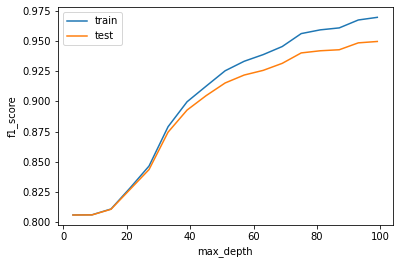

In [77]:
# plot graph between max_depth vs f1_score
plt.plot(max_depth, f1_train_scores, label = 'train')
plt.plot(max_depth, f1_test_scores, label = 'test')
plt.xlabel('max_depth')
plt.ylabel('f1_score')
plt.legend()

plt.show()

### n_estimators

In [79]:
n_estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500]

accu_train_scores, accu_test_scores, f1_train_scores, f1_test_scores = [], [], [], []
for ne in n_estimators:
    print("n_estimators: ", ne)
    f1_train_score, f1_test_score = rfc(ne, 25)
    f1_train_scores.append(f1_train_score)
    f1_test_scores.append(f1_test_score)

n_estimators:  10
n_estimators:  20
n_estimators:  30
n_estimators:  40
n_estimators:  50
n_estimators:  60
n_estimators:  70
n_estimators:  80
n_estimators:  90
n_estimators:  100
n_estimators:  200
n_estimators:  300
n_estimators:  400
n_estimators:  500


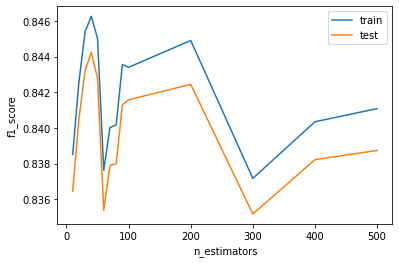

In [80]:
# plot f1_score
plt.plot(n_estimators, f1_train_scores, label = 'train')
plt.plot(n_estimators, f1_test_scores, label = 'test')
plt.xlabel('n_estimators')
plt.ylabel('f1_score')
plt.legend()

plt.show()

### min_sample_split

In [ ]:
min_samples_split = list(range(2, 52,2))

f1_train_scores, f1_test_scores = [], []
for mss in min_samples_split:
    print("min_samples_split: ", mss)
    f1_train_score, f1_test_score = rfc(30, 25, mss)
    f1_train_scores.append(f1_train_score)
    f1_test_scores.append(f1_test_score)

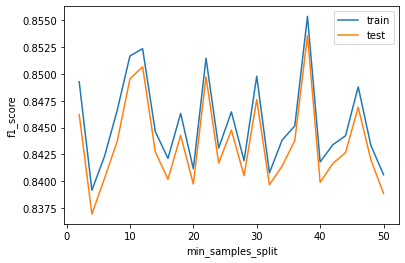

In [87]:
# plot f1_score
plt.plot(min_samples_split, f1_train_scores, label = 'train')
plt.plot(min_samples_split, f1_test_scores, label = 'test')
plt.xlabel('min_samples_split')
plt.ylabel('f1_score')
plt.legend()

plt.show()

### min_samples_leaf

In [ ]:
min_samples_leaf = list(range(1, 52,2))

f1_train_scores, f1_test_scores = [], []

for msl in min_samples_leaf:
    print("min_samples_leaf: ", msl)
    f1_train_score, f1_test_score = rfc(30, 25, 36, msl)
    f1_train_scores.append(f1_train_score)
    f1_test_scores.append(f1_test_score)

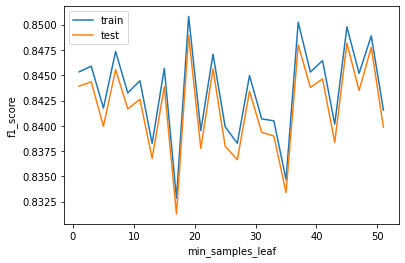

In [90]:
# plot f1_score
plt.plot(min_samples_leaf, f1_train_scores, label = 'train')
plt.plot(min_samples_leaf, f1_test_scores, label = 'test')
plt.xlabel('min_samples_leaf')
plt.ylabel('f1_score')
plt.legend()

plt.show()

## Randomized search cv for efficient way to find best parameters

### Using coarse parameters

In [10]:
vectorizer = TfidfVectorizer(max_features = 10000)
X = vectorizer.fit_transform(df['text'])
y = df['label']

# random search for random forest
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10, 20, 30, 40, 50],
    'min_samples_leaf': [5, 10],
    'bootstrap': [True, False]
    }

rgs = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rgs.fit(X, y)

print(rgs.best_params_)
print(rgs.best_score_)
print(rgs.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 50, 'min_samples_split': 40, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
0.781985904226027
RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=40,
                       n_estimators=50)


### Using closer values

In [11]:
param_grid = {
    'n_estimators': [30, 40, 50, 60, 70],
    'max_depth': [25, 30, 35, 40, 45, 50],
    'min_samples_split': [30, 35, 40, 45, 50],
    'min_samples_leaf': [3, 4, 5, 6, 7]
    }

rgs = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = param_grid, n_iter = 50, cv = 3, verbose=3, random_state=42, n_jobs = -1)
rgs.fit(X, y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'n_estimators': 40, 'min_samples_split': 40, 'min_samples_leaf': 7, 'max_depth': 50}
0.8613367519493603
RandomForestClassifier(max_depth=50, min_samples_leaf=7, min_samples_split=40,
                       n_estimators=40)


#### Best parameters = {
    'n_estimators': 40,
    'min_samples_split': 40,
    'min_samples_leaf': 7,
    'max_depth': 50
}

## Final Model

In [10]:
vectorizer = TfidfVectorizer(max_features = 10000)
X = vectorizer.fit_transform(df['text'])
y = df['label']

kfold = KFold(n_splits = 5, shuffle = True)
model = RandomForestClassifier(n_estimators = 40, min_samples_split = 40, min_samples_leaf = 7, max_depth = 50)
print("~~ K-Fold Cross validate started ~~")
start = time.time()
results = cross_validate(model, X, y, cv = kfold, scoring = ('accuracy', 'f1', 'precision', 'recall'))
end = time.time()
print("Time taken for the completion:",end-start)
print('Accuracy: ', results['test_accuracy'].mean())
print('F1: ', results['test_f1'].mean())
print('Precision: ', results['test_precision'].mean())
print('Recall: ', results['test_recall'].mean())

~~ K-Fold Cross validate started ~~
Time taken for the completion: 112.46994662284851
Accuracy:  0.8340370675183623
F1:  0.8895734901973746
Precision:  0.8071482083867938
Recall:  0.9907549823364208


<h2 style="padding: 20px;color: #50C878; border: 1px solid #50C878; border-radius: 7px;">We can observe that scores (especially f1) are improved around <i>"10%"</i> compared to when used only default parameters</h2>